# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [3]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [4]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\sondr\AppData\Local\Temp\ipykernel_19084\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\sondr\AppData\Local\Temp\ipykernel_19084\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\sondr\AppData\Local\Temp\ipykernel_19084\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num
C:\Users\sondr\AppData

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [5]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [6]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

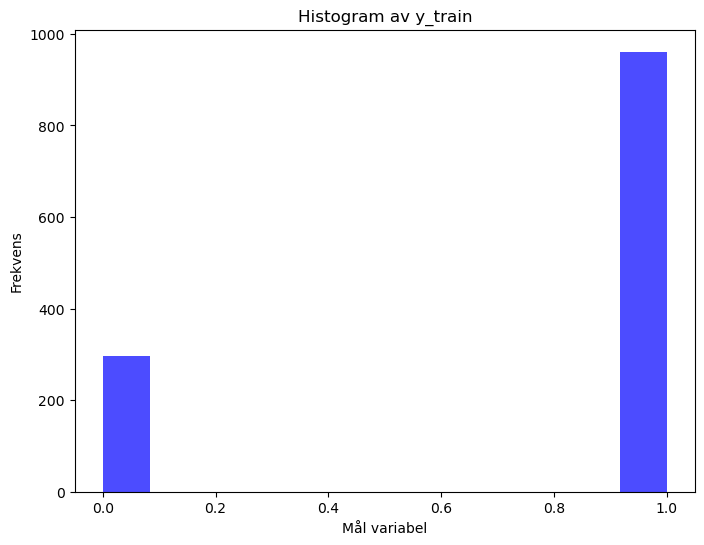

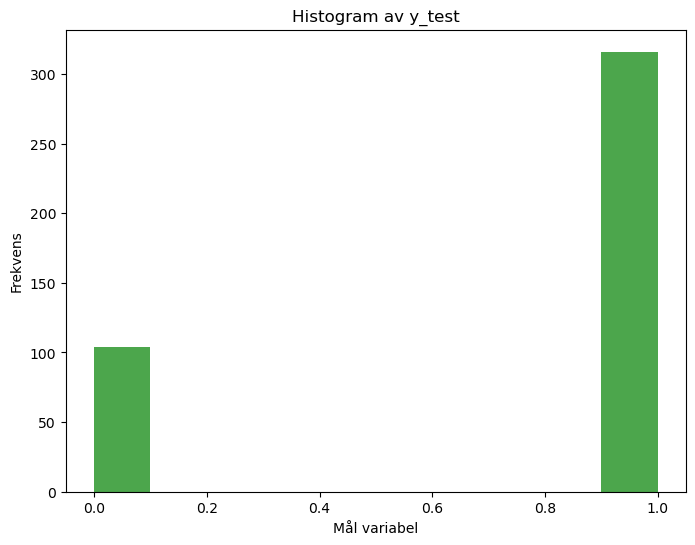

In [8]:
#TODO: visualiser y_train og y_test i et histogram

# OLD

import matplotlib.pyplot as plt

# Visualisere y_train i et histogram
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins='auto', color='blue', alpha=0.7)
plt.title('Histogram av y_train')
plt.xlabel('Mål variabel')
plt.ylabel('Frekvens')
plt.show()

# Visualisere y_test i et histogram
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins='auto', color='green', alpha=0.7)
plt.title('Histogram av y_test')
plt.xlabel('Mål variabel')
plt.ylabel('Frekvens')
plt.show()


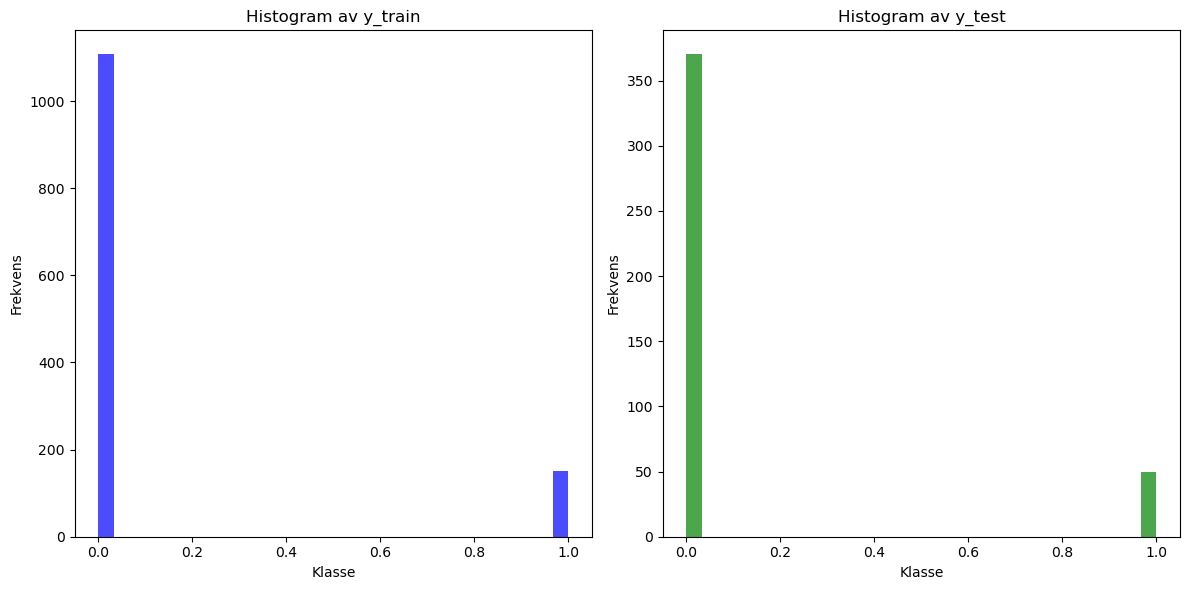

In [7]:
import matplotlib.pyplot as plt

# NEW

# Visualisere y_train og y_test i et histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Histogram av y_train')
plt.xlabel('Klasse')
plt.ylabel('Frekvens')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='green', alpha=0.7)
plt.title('Histogram av y_test')
plt.xlabel('Klasse')
plt.ylabel('Frekvens')

plt.tight_layout()
plt.show()

**Svar:**

*< ditt tekstsvar her >*

Det ser ut som målvariabelen har et begrenset sett med diskrete verdier, noe som forårsaker hull mellom stolpene. Denne typen fordeling antyder at vi har et klassifiseringsproblem, ikke et regresjonsproblem.

I et regresjonsproblem vil målvariabelen typisk ha en kontinuerlig og jevn fordeling, mens målvariabelen i et klassifiseringsproblem består av forskjellige klasser eller kategorier, noe som resulterer i et histogram med atskilte søyler.

Det er sannsynlig at målvariabelen representerer forskjellige klasser eller kategorier, noe som gjør det til et klassifiseringsproblem. I dette tilfelle er Target en binær variabel (0 og 1) og derfor er det et klassifiseringsproblem.

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


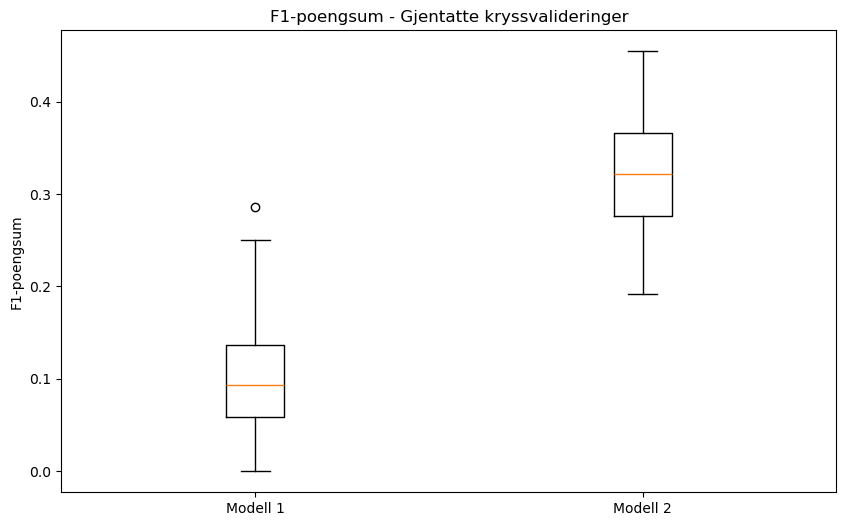

Tosidig t-testresultat for F1-poeng: p-verdi = 4.022187072190957e-25
Forskjellen i F1-score er statistisk signifikant.


In [52]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.metrics import f1_score
from scipy.stats import ttest_rel
from sklearn.preprocessing import StandardScaler

# NEW PART 1 (fokus på oppgaven, uten å tenke så mye på hvordan modellen vil se ut)

# Laster inn datasettet
df = pd.read_csv("./datasett2.csv")

# Konverterer kategoriske variabler til heltall
kolonner_obj = df.select_dtypes(include=['object']).columns
for i in kolonner_obj:
    unique_values = list(df[i].unique())
    df[i] = df[i].apply(lambda x: unique_values.index(x))

# Konverterer alle kolonner til strengtype
df = df.astype(str)

# Deler opp datasettet i egenskaper (X) og mål (y)
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Definerer modellene
model1 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)
model2 = SVC(C = 3, gamma = "auto", kernel = "rbf", random_state=0)

# Definerer poengberegninger
scoring_f1 = make_scorer(f1_score)
scoring_accuracy = make_scorer(accuracy_score)

# Utfører gjentatte kryssvalideringer med K=5
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Skalering
skalering = StandardScaler()

# Beregner F1-poeng manuelt for å håndtere NaN-verdier
def calculate_f1_scores(model, X, y, cv):
    f1_scores = []
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Skalering
        X_train = skalering.fit_transform(X_train)
        X_test = skalering.transform(X_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='binary', pos_label='1')
        f1_scores.append(f1)

    return np.array(f1_scores)

# Evaluerer modeller ved å bruke F1-score og nøyaktighet
scores_model1_f1 = calculate_f1_scores(model1, X, y, cv)
scores_model2_f1 = calculate_f1_scores(model2, X, y, cv)

scores_model1_accuracy = cross_val_score(model1, X, y, scoring=scoring_accuracy, cv=cv, n_jobs=-1)
scores_model2_accuracy = cross_val_score(model2, X, y, scoring=scoring_accuracy, cv=cv, n_jobs=-1)

# Visualiser F1-poeng som et boksplott
plt.figure(figsize=(10, 6))
plt.boxplot([scores_model1_f1, scores_model2_f1], labels=['Modell 1', 'Modell 2'])
plt.title('F1-poengsum - Gjentatte kryssvalideringer')
plt.ylabel('F1-poengsum')
plt.show()

# Gjennomfører en tosidig T-test
t_stat, p_value = ttest_rel(scores_model1_f1, scores_model2_f1, nan_policy='omit')

# Tolker resultatene
print("Tosidig t-testresultat for F1-poeng: p-verdi =", p_value)
if p_value < 0.05:
    print("Forskjellen i F1-score er statistisk signifikant.")
else:
    print("Forskjellen i F1-score er ikke statistisk signifikant.")

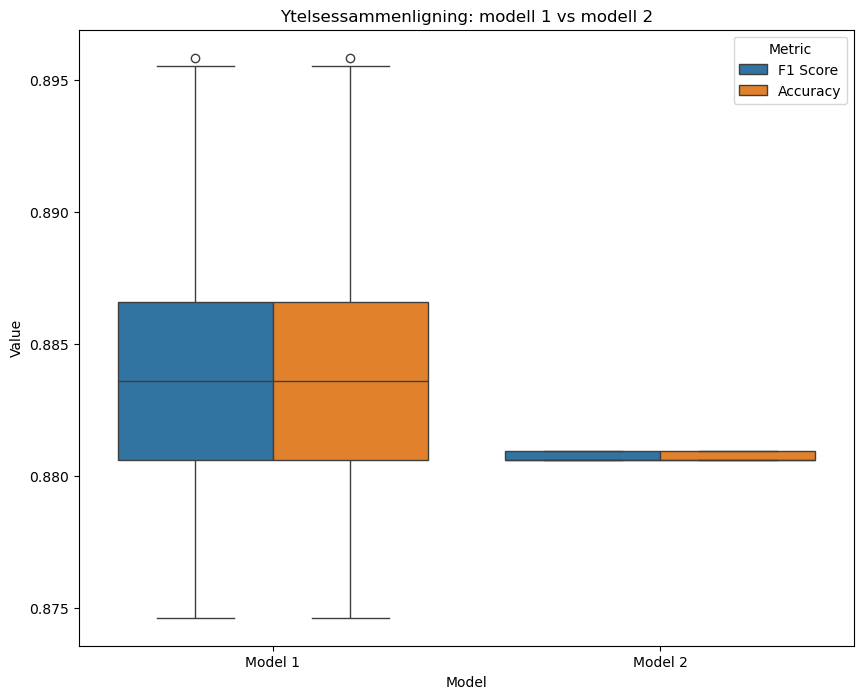

In [54]:
import seaborn as sns
from sklearn.svm import SVC
from scipy.stats import ttest_rel

# NEW PART 2 (fokus på å lage en bedre modell)

# Forutsatt at X, y, modell1 og modell2 er definert

# Funksjon for å beregne F1-poeng
def calculate_f1_scores(model, X, y, cv):
    f1_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return np.array(f1_scores)

# Funksjon for å beregne nøyaktighet
def calculate_accuracy(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.array(accuracy_scores)

# Gjentatte kryssvalideringsparametere
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Modell 1 og Modell 2
model1 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)
model2 = SVC(C = 3, gamma = "auto", kernel = "rbf", random_state=0)

# Evaluer modeller ved å bruke F1-score og nøyaktighet
scores_model1_f1 = calculate_f1_scores(model1, X, y, cv)
scores_model2_f1 = calculate_f1_scores(model2, X, y, cv)

scores_model1_accuracy = calculate_accuracy(model1, X, y, cv)
scores_model2_accuracy = calculate_accuracy(model2, X, y, cv)

# Kombinerer F1-poeng og nøyaktighet i en enkelt DataFrame
df_scores = pd.DataFrame({'Model': ['Model 1'] * len(scores_model1_f1) + ['Model 2'] * len(scores_model2_f1),
                          'Metric': ['F1 Score'] * (len(scores_model1_f1) + len(scores_model2_f1)),
                          'Value': np.concatenate([scores_model1_f1, scores_model2_f1])})

df_accuracy = pd.DataFrame({'Model': ['Model 1'] * len(scores_model1_accuracy) + ['Model 2'] * len(scores_model2_accuracy),
                             'Metric': ['Accuracy'] * (len(scores_model1_accuracy) + len(scores_model2_accuracy)),
                             'Value': np.concatenate([scores_model1_accuracy, scores_model2_accuracy])})

df_combined = pd.concat([df_scores, df_accuracy])

# Lager et boksplott med separate bokser for modell 1 og modell 2
plt.figure(figsize=(10, 8))
sns.boxplot(x='Model', y='Value', hue='Metric', data=df_combined)
plt.title('Ytelsessammenligning: modell 1 vs modell 2')
plt.show()

# Gjennomfører en tosidig T-test
t_stat, p_value = ttest_rel(scores_model1_f1, scores_model2_f1, nan_policy='omit')

**Svar:**

# NEW

P-verdien jeg fikk fra den tosidige t-testen på F1-skårene er veldig nær null (4.022187072190957e-25). I hypotesetesting representerer p-verdien sannsynligheten for å observere en teststatistikk like ekstrem som, eller mer ekstrem enn, den jeg har observert, forutsatt at nullhypotesen er sann. I denne sammenhengen:

Nullhypotese (H0): Det er ingen signifikant forskjell mellom F1-skårene til modell 1 og modell 2.
Alternativ hypotese (H1): Det er en signifikant forskjell mellom F1-skårene til modell 1 og modell 2.

Med en veldig lav p-verdi (nær null) forkaster man typisk nullhypotesen. Rent praktisk antyder dette at det er en betydelig forskjell i F1-skårene mellom modell 1 og modell 2. Hvis gjennomsnittlig F1-poengsum for en modell er betydelig høyere enn den andre, er den modellen sannsynligvis bedre når det gjelder F1-score. I dette tilfelle er det modell 1 med RandomForestClassifier.

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

P-value of F1 Score: 0.049271846352623314


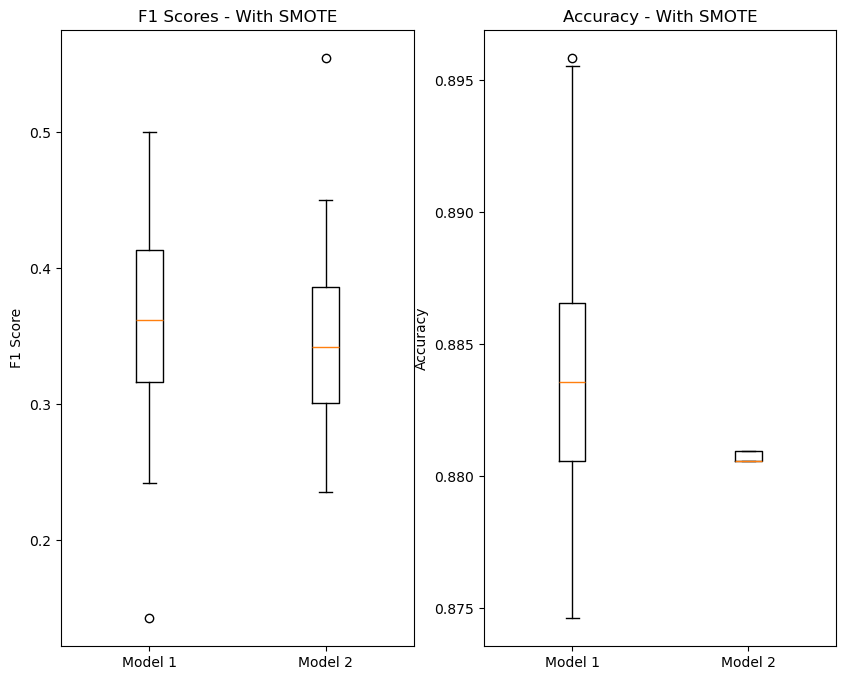

In [55]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# NEW

# Skalering
skalering = StandardScaler()

# Funksjon for å beregne F1-poeng
def calculate_f1_scores(model, X, y, cv):
    f1_scores = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Skalering
        X_train = skalering.fit_transform(X_train)
        X_test = skalering.transform(X_test)

        # Bruker kun SMOTE på treningsdataene
        smote = SMOTE()
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Konverterer etiketter til heltall
        y_train_smote = y_train_smote.astype(int)
        y_test = y_test.astype(int)

        # Trener modellen
        model.fit(X_train_smote, y_train_smote)

        # Forutsier testsettet
        y_pred = model.predict(X_test)

        # Beregner F1-poengsum og lagre
        f1 = f1_score(y_test, y_pred, average='binary')
        f1_scores.append(f1)

    return np.array(f1_scores)

# Konverterer etiketter til heltall
y = y.astype(int)

# Modeller
model1 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)
model2 = SVC(C = 3, gamma = "auto", kernel = "rbf", random_state=0)

# Kryssvalideringsinnstillinger
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Poengberegninger
scoring_f1 = make_scorer(f1_score, average='binary')
scoring_accuracy = make_scorer(accuracy_score)

# Evaluerer modeller ved å bruke F1-score og nøyaktighet
scores_model1_f1 = calculate_f1_scores(model1, X, y, cv)
scores_model2_f1 = calculate_f1_scores(model2, X, y, cv)

scores_model1_accuracy = cross_val_score(model1, X, y, scoring=scoring_accuracy, cv=cv, n_jobs=-1)
scores_model2_accuracy = cross_val_score(model2, X, y, scoring=scoring_accuracy, cv=cv, n_jobs=-1)

# Calculate p-value for F1 scores
t_stat, p_value = ttest_rel(scores_model1_f1, scores_model2_f1)

# Print the p-value
print(f"P-value of F1 Score: {p_value}")

# Visualiserer F1-score og nøyaktighet
plt.figure(figsize=(10, 8))

# Boksplott for F1-poeng
plt.subplot(1, 2, 1)
plt.boxplot([scores_model1_f1, scores_model2_f1], labels=['Model 1', 'Model 2'])
plt.title('F1 Scores - With SMOTE')
plt.ylabel('F1 Score')

# Boksplott for nøyaktighet
plt.subplot(1, 2, 2)
plt.boxplot([scores_model1_accuracy, scores_model2_accuracy], labels=['Model 1', 'Model 2'])
plt.title('Accuracy - With SMOTE')
plt.ylabel('Accuracy')

plt.show()

**Svar:**

# NEW

P-verdien som er et resultat av den tosidige t-testen på F1-skårene indikerer sannsynligheten for å observere slike ekstreme forskjeller i F1-skårene mellom modell 1 og modell 2, forutsatt at det ikke er noen reell forskjell mellom de to modellene (nullhypotesen) ). En mindre p-verdi antyder sterkere bevis mot nullhypotesen.

I ditt tilfelle er p-verdien 0,049271846352623314, som er liten. Vanligvis brukes et signifikansnivå (alfa) på 0,05. Hvis p-verdien er mindre enn signifikansnivået, forkaster du nullhypotesen. I ditt tilfelle er p-verdien mindre enn 0,05, så du vil forkaste nullhypotesen.

Derfor har jeg bevis som tyder på at det er en signifikant forskjell i F1-score mellom modell 1 og modell 2. Siden modell 2 sammenlignes med modell 1, og jeg avviser nullhypotesen, tyder det på at modell 2 presterer betydelig bedre enn modell 1, når det gjelder F1-poengsum basert på resultatene av de gjentatte kryssvalideringene.

Oppsummert antyder den lille p-verdien at den observerte forskjellen i F1-skåre mellom modell 1 og modell 2 sannsynligvis ikke skyldes tilfeldige tilfeldigheter, og jeg har statistiske bevis for å støtte konklusjonen om at modell 2 er bedre enn modell 1 når det gjelder av F1-poengsum.

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [56]:
from sklearn.model_selection import train_test_split

# NEW

# Laster inn datasettet
df = pd.read_csv("./datasett2.csv")

# Konverterer kategoriske variabler til heltall
kolonner_obj = df.select_dtypes(include=['object']).columns
for i in kolonner_obj:
    unique_values = list(df[i].unique())
    df[i] = df[i].apply(lambda x: unique_values.index(x))

# Konverterer alle kolonner til strengtype
df = df.astype(str)

# Deler opp datasettet i funksjoner (X) og mål (y)
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Deler opp dataene i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definerer den beste modellen (bruk de beste parameterne fra oppgavene 2.2 og 2.3)
best_model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)

# Trener modellen på treningsdataene
best_model.fit(X_train, y_train)

# Forutsier testsettet
y_pred = best_model.predict(X_test)

# Evaluerer ytelsen på testsettet
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Beregn sensitivitet, spesifisitet, presisjon, F1-score og nøyaktighet
sensitivity = recall_score(y_test, y_pred, pos_label='1')
specificity = recall_score(y_test, y_pred, pos_label='0')
precision = precision_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')
accuracy = accuracy_score(y_test, y_pred)

# Skriver ut resultatene
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
 [[295   3]
 [ 36   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       298
           1       0.40      0.05      0.09        38

    accuracy                           0.88       336
   macro avg       0.65      0.52      0.52       336
weighted avg       0.84      0.88      0.84       336

Sensitivity: 0.05263157894736842
Specificity: 0.9899328859060402
Precision: 0.4
F1 Score: 0.09302325581395349
Accuracy: 0.8839285714285714


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score
import pandas as pd

# NEW (doesn't change into strings)

# Laster inn datasett
df = pd.read_csv("./datasett2.csv")

# Definerer funksjoner og mål
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Deler opp dataene i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definer numeriske og kategoriske funksjoner
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Lager transformatorer for numeriske og kategoriske funksjoner
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Lager en kolonnetransformator for å bruke forskjellige transformatorer på numeriske og kategoriske funksjoner
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definerer den beste modellen (bruker de beste parameterne fra oppgavene 2.2 og 2.3)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10))])

# Trener modellen på treningsdataene
model.fit(X_train, y_train)

# Forutsier testsettet
y_pred = model.predict(X_test)

# Evaluerer ytelsen på testsettet
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Beregn sensitivitet, spesifisitet, presisjon, F1-score og nøyaktighet
sensitivity = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Skriver ut resultatene
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
 [[297   1]
 [ 36   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       298
           1       0.67      0.05      0.10        38

    accuracy                           0.89       336
   macro avg       0.78      0.52      0.52       336
weighted avg       0.87      0.89      0.85       336

Sensitivity: 0.05263157894736842
Specificity: 0.9966442953020134
Precision: 0.6666666666666666
F1 Score: 0.09756097560975609
Accuracy: 0.8898809523809523


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score
import pandas as pd

# NEW

# Laster inn datasett
df = pd.read_csv("./datasett2.csv")

# Definerer funksjoner og mål
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Deler opp dataene i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definerer numeriske og kategoriske funksjoner
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Lager transformatorer for numeriske og kategoriske funksjoner
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Lager en kolonnetransformator for å bruke forskjellige transformatorer på numeriske og kategoriske funksjoner
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definer modellen
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10))])

# Trener modellen på treningsdataene
model.fit(X_train, y_train)

# Forutsier testsettet
y_pred = model.predict(X_test)

# Skill testsettet basert på kjønn
male_indices = X_test[X_test['Gender'] == 'Male'].index
female_indices = X_test[X_test['Gender'] == 'Female'].index

X_male = X_test.loc[male_indices]
y_male = y_test.loc[male_indices]

X_female = X_test.loc[female_indices]
y_female = y_test.loc[female_indices]

# Spådommer for mannlige og kvinnelige grupper
y_pred_male = model.predict(X_male)
y_pred_female = model.predict(X_female)

# Evaluerer ytelsen for menn
conf_matrix_male = confusion_matrix(y_male, y_pred_male)
classification_rep_male = classification_report(y_male, y_pred_male)

# Beregner sensitivitet, spesifisitet, presisjon, F1-score og nøyaktighet for menn
sensitivity_male = recall_score(y_male, y_pred_male)
specificity_male = recall_score(y_male, y_pred_male, pos_label=0)
precision_male = precision_score(y_male, y_pred_male)
f1_male = f1_score(y_male, y_pred_male)
accuracy_male = accuracy_score(y_male, y_pred_male)

# Skriver ut resultatene for menn
print("Performance Metrics for Men:")
print("Confusion Matrix:\n", conf_matrix_male)
print("\nClassification Report:\n", classification_rep_male)
print(f"Sensitivity: {sensitivity_male}")
print(f"Specificity: {specificity_male}")
print(f"Precision: {precision_male}")
print(f"F1 Score: {f1_male}")
print(f"Accuracy: {accuracy_male}")

# Evaluerer ytelsen for kvinner
conf_matrix_female = confusion_matrix(y_female, y_pred_female)
classification_rep_female = classification_report(y_female, y_pred_female)

# Beregner sensitivitet, spesifisitet, presisjon, F1-score og nøyaktighet for kvinner
sensitivity_female = recall_score(y_female, y_pred_female)
specificity_female = recall_score(y_female, y_pred_female, pos_label=0)
precision_female = precision_score(y_female, y_pred_female)
f1_female = f1_score(y_female, y_pred_female)
accuracy_female = accuracy_score(y_female, y_pred_female)

# Skriver ut resultatene for kvinner
print("\nPerformance Metrics for Women:")
print("Confusion Matrix:\n", conf_matrix_female)
print("\nClassification Report:\n", classification_rep_female)
print(f"Sensitivity: {sensitivity_female}")
print(f"Specificity: {specificity_female}")
print(f"Precision: {precision_female}")
print(f"F1 Score: {f1_female}")
print(f"Accuracy: {accuracy_female}")


Performance Metrics for Men:
Confusion Matrix:
 [[173   1]
 [ 26   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       174
           1       0.50      0.04      0.07        27

    accuracy                           0.87       201
   macro avg       0.68      0.52      0.50       201
weighted avg       0.82      0.87      0.81       201

Sensitivity: 0.037037037037037035
Specificity: 0.9942528735632183
Precision: 0.5
F1 Score: 0.06896551724137931
Accuracy: 0.8656716417910447

Performance Metrics for Women:
Confusion Matrix:
 [[124   0]
 [ 10   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       124
           1       1.00      0.09      0.17        11

    accuracy                           0.93       135
   macro avg       0.96      0.55      0.56       135
weighted avg       0.93      0.93      0.90       135

Sensitivity

**Svar:**

*< ditt tekstsvar her >*

Ytelsesmål for menn:
Sensitivitet/gjenkalling (sann positiv rate): Svært lav (0,04), noe som indikerer at modellen bare identifiserer en liten andel av faktiske positive tilfeller for menn.

Spesifisitet (True Negative Rate): Høy (0,99), noe som indikerer at modellen korrekt identifiserer en stor andel av faktiske negative tilfeller for menn.

Presisjon: Moderat (0,5), noe som indikerer at blant tilfellene som er spådd som positive for menn, er bare halvparten sanne positive.
F1-score: Lav (0,07), som gjenspeiler avveiningen mellom presisjon og gjenkalling.

Nøyaktighet: Høy (0,87), men den kan være misvisende på grunn av klasseubalanse.


Ytelsesmål for kvinner:
Sensitivitet/gjenkalling (True Positive Rate): Lav (0,09), noe som indikerer at modellen identifiserer bare en liten andel av faktiske positive tilfeller for kvinner.

Spesifisitet (True Negative Rate): Høy (1,0), noe som indikerer at modellen korrekt identifiserer alle faktiske negative tilfeller for kvinner.

Presisjon: Høy (1,0), noe som indikerer at blant tilfellene som er spådd som positive for kvinner, er alle sanne positive.

F1-score: Lav (0,17), som gjenspeiler avveiningen mellom presisjon og gjenkalling.

Nøyaktighet: Høy (0,93), men den kan være misvisende på grunn av klasseubalanse.


Analyse:
Klasseubalanse: Begge sensitivitetsverdiene er lave, spesielt for menn. Dette kan skyldes et problem med klasseubalanse, der modellen er partisk mot å forutsi majoritetsklassen (0).

Ubalansert presisjon og tilbakekalling: Modellene har ubalansert presisjon og tilbakekalling, noe som indikerer en avveining. Modellene er mer konservative når det gjelder å forutsi positive tilfeller (Attrisjon = 1), noe som resulterer i lav sensitivitet.



Modellene gir ikke like gode resultater for begge kjønn basert på resultatene. Det er merkbare forskjeller i ytelsesmålinger, spesielt i følsomhet (gjenkalling) og presisjon. Her er de viktigste observasjonene:

For menn:

Sensitivitet (gjenkalling): Svært lav (0,04), noe som indikerer at modellen bare identifiserer en liten andel av faktiske positive tilfeller for menn.
Presisjon: Moderat (0,5), noe som antyder at blant tilfellene som er spådd som positive for menn, er bare halvparten sanne positive.

For kvinner:

Sensitivitet (gjenkalling): Lav (0,09), noe som indikerer at modellen bare identifiserer en liten andel av faktiske positive tilfeller for kvinner.
Presisjon: Høy (1,0), noe som indikerer at blant tilfellene som er spådd som positive for kvinner, er alle sanne positive.

Mulige årsaker:
Klasseubalanse: Klasseubalanseproblemet kan påvirke modellens ytelse, spesielt når man forutsier minoritetsklassen (Attrisjon = 1). Dette fremgår av de lave følsomhetsverdiene.

Funksjonsviktighet: Enkelte funksjoner, inkludert kjønnsrelaterte, kan påvirke spådommene. Å analysere funksjonens betydning kan gi innsikt i hvilke funksjoner som bidrar vesentlig til modellens beslutninger.

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [58]:
!pip freeze > requirements.txt